In [2]:
import urllib
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import community
from networkx.algorithms.community import LFR_benchmark_graph
from community import community_louvain
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import label_propagation_communities
from networkx.algorithms.community import asyn_lpa_communities
from networkx.algorithms.community import greedy_modularity_communities
import pandas as pd
from IPython.display import display, HTML, display_pretty
import os
%matplotlib inline

In [21]:
!pip freeze | grep matplotlib

absl-py==0.9.0
aio-pika==6.4.1
aiohttp==3.6.2
aiormq==3.2.1
alembic==1.2.1
alphabet-detector==0.0.7
aplus==0.11.0
apptools==4.5.0
arrayfiles==0.0.1
astor==0.8.1
astropy==4.0.1.post1
astunparse==1.6.3
async-generator==1.10
async-timeout==3.0.1
attrs==19.3.0
backcall==0.1.0
backports.functools-lru-cache==1.3
banal==1.0.1
bert-dp @ git+https://github.com/deepmipt/bert.git@741d9bed9d52c6a9409ca27d8bf284615645618b
bitarray==1.5.3
bleach==3.1.0
blis==0.4.1
bokeh==2.0.2
boostlib==0.1.2
boto==2.49.0
boto3==1.10.42
botocore==1.13.42
bpemb==0.3.2
bqplot==0.12.17
branca==0.4.1
cachetools==4.1.1
catalogue==1.0.0
certifi==2019.9.11
cffi==1.14.0
chainer==7.7.0
chardet==3.0.4
chart-studio==1.1.0
click==7.1.2
cloudpickle==1.4.1
coloredlogs==14.0
colorlover==0.3.0
community==1.0.0b1
configobj==5.0.6
configparser==5.0.1
contextvars==2.4
cryptography==2.9
cufflinks==0.17.3
cx-Oracle==7.3.0
cycler==0.10.0
cymem==2.0.3
Cython==0.29.14
dask==2.23.0
dataclasses==0.7
dataset==1.4.1
datasets==1.1.3
datrie==0.7

In [3]:
# Louvain's community detection method
def detect_communities_louvain(G):
    partition = community_louvain.best_partition(G)
    communities = list()
    for com in set(partition.values()) :
        list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
        communities.append(sorted(list_nodes))
    return sorted(communities)

# Girvan Newman's community detection method
def greedy_modularity_communities(G):
    communities = community.greedy_modularity_communities(G)
    return sorted(sorted(c) for c in communities)

# Girvan Newman's community detection method
def detect_communities_girvan_newman(G):
    communities = community.girvan_newman(G)
    return sorted(sorted(c) for c in communities)

# Fast Greedy community detection method
def detect_communities_greedy(G):
    communities = greedy_modularity_communities(G)
    return sorted(map(sorted, communities))

# Label propagation community detection method
def detect_communities_label_propagation(G):
    communities = list()
    #for c in asyn_lpa_communities(G):
    for c in label_propagation_communities(G):
        communities.append(sorted(c))
    return sorted(communities)


Function to plot communities

In [4]:
# Plot graph with communities, receives a list of communities, where each community is a list of nodes (ints)
def show_communities(G, communities, name='title'):
    pos=nx.spring_layout(G)
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w','b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    plt.figure()
    plt.title(name, fontsize=20)
    aux = 0
    for community in communities:
        nx.draw_networkx_nodes(G, pos, community, node_size = 50, node_color = colors[aux])
        aux = aux + 1
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show(block=True)

In [5]:

#url = "https://dl.dropboxusercontent.com/s/q9geru5vtmz5b55/vk.adjlist?dl=1"
#with urllib.request.urlopen(url) as f:
#    data = f.read().decode('utf-8')
#with open('vk.adjlist', 'w') as f:
#    f.write(data) 
    
G = nx.read_adjlist('vk.adjlist')
#coord = nx.spring_layout(G, k = 0.15)

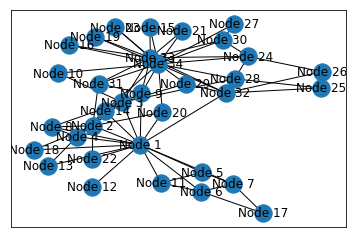

In [6]:
G = nx.read_gml(path = 'karate.gml')
nx.draw_networkx(G)

In [7]:
k = dict (G.degree ())
k2 = {key: value for key, value in k.items() if value > 0}
G2 = G.subgraph(list(k2.keys()))

In [8]:
# take only giant connected component for the further analysis: 
G = max(nx.connected_component_subgraphs(G), key=len)
print("Number of nodes -", len(G.nodes()))
print("Number of edges -", len(G.edges()))

Number of nodes - 34
Number of edges - 78


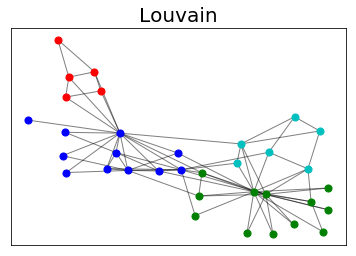

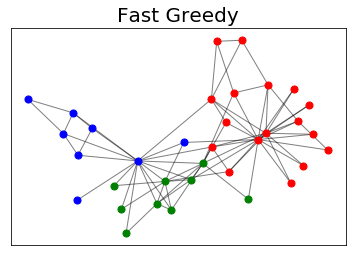

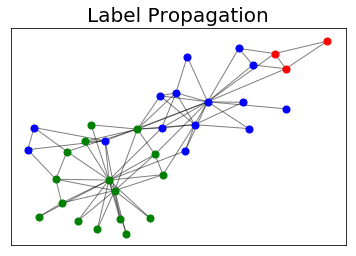

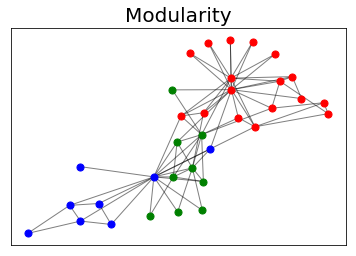

In [14]:
methods = {
    'Louvain': detect_communities_louvain,
    #'Girvan Newman': detect_communities_girvan_newman,
    'Fast Greedy': detect_communities_greedy,
    'Label Propagation': detect_communities_label_propagation,
    'Modularity': greedy_modularity_communities
}

for method in methods.items():
    result = method[1](G)
    show_communities(G, result, name=method[0])

In [28]:
result = detect_communities_label_propagation(G)

In [29]:
result

[['VK_100199564',
  'VK_101253787',
  'VK_13725705',
  'VK_149119576',
  'VK_161337458',
  'VK_168173472',
  'VK_181207550',
  'VK_191023724',
  'VK_195507581',
  'VK_214669128',
  'VK_219900006',
  'VK_268051612',
  'VK_287087845',
  'VK_31862158',
  'VK_345920009',
  'VK_447828152',
  'VK_4597213',
  'VK_55090804',
  'VK_62509035',
  'VK_66368642',
  'VK_69370000',
  'VK_82512790'],
 ['VK_100367661',
  'VK_10173795',
  'VK_102038177',
  'VK_103092066',
  'VK_103433860',
  'VK_105635982',
  'VK_107202344',
  'VK_107442540',
  'VK_113740887',
  'VK_115001535',
  'VK_118277097',
  'VK_119212856',
  'VK_119474923',
  'VK_119983751',
  'VK_120226585',
  'VK_122544725',
  'VK_122814815',
  'VK_123957763',
  'VK_125376855',
  'VK_126399373',
  'VK_12724499',
  'VK_129933246',
  'VK_130652044',
  'VK_132361628',
  'VK_132923013',
  'VK_133870794',
  'VK_135349376',
  'VK_136287450',
  'VK_136569943',
  'VK_137693954',
  'VK_137925521',
  'VK_13798190',
  'VK_138013747',
  'VK_138219225',
  '

In [ ]:
show_communities(G, result, name=methodNames[i])